<a href="https://colab.research.google.com/github/stephenbeckr/numerical-analysis-class/blob/master/Demos/Ch3_Splines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cubic Splines

This lab is designed to help you program your own cubic splines.

We'll first focus on **natural boundary conditions** meaning that $s''$ is 0 at the endpoints (where $s$ is the spline)

Let's also first focus on **equispaced nodes**

- Task 1: create nodes, and function values on these nodes.  Some suggestions are below, but you can change these

We have 11 nodes, with a spacing of 0.10 between them


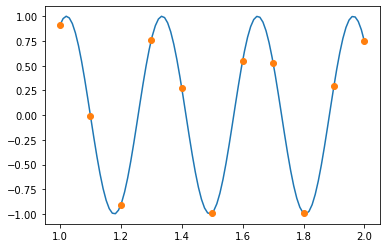

In [17]:
import numpy as np
import matplotlib.pyplot as plt

n     = 10
a,b = 1,2
nodes = np.linspace(a,b,num=n+1) # for interpolation
h = nodes[1]-nodes[0]
print("We have {:} nodes, with a spacing of {:.2f} between them".format(len(nodes), h ) )

f   = lambda x : np.sin(20*x)
y   = f(nodes)

xGrid = np.linspace(a,b,100)  # for plotting
plt.plot( xGrid, f(xGrid), label="True function");
plt.plot( nodes, y, 'o', label="Data");

## Build the matrix equation
- Task 2: Following the notes, setup the matrix equation.  For now, don't worry about exploiting the triadiagonal structure
  - You don't have to do this, but you could build it using a sparse matrix format.  Scipy has [`scipy.sparse.spdiags`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.spdiags.html) which makes this easy (in Matlab, it is just `spdiags`)

## Solve the matrix equation
- Task 3: Solve the matrix equation, using `np.linalg.solve`. This gives is the "c" coefficients for each polynomial piece
  - If you did want to solve this more efficiently, taking advantage of the tridiagonal structure, you could program the [Thomas algorithm](https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm) yourself, or call [scipy.linalg.solve_banded](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_banded.html); however, if you use this banded solver, you may need to first convert the matrix to be the right data type.



## Fill in the rest of the coefficients
- Task 4: from knowledge of "c", fill in values for "a", "b" and "c" coefficients

## Finish
- Task 5: with the coefficients, make a function that will evaluate the spline.
  - There are several ways you can do this; the big issue is you need to figure out which interval the point falls into. One way to do this is [`np.searchsorted`](https://numpy.org/doc/stable/reference/generated/numpy.searchsorted.html)
- Task 6: plot the spline